Yo en estas clases voy a usar Python y algunas librerías muy útiles. Python es un estándar para procesamiento de datos. Además es libre!
En la materia no les vamos a exigir programar en Python. Podrán usar lo que más les guste o lo que les sugieran en cada curso práctico. No es nuestro objetivo enseñar Python o ningún software específico.

Vamos a generar y graficar algunas señales de interés. Al trabajar en una computadora las señales que generemos son esencialmente de tiempo discreto. Sin embargo, teniendo claro este punto podemos "engañarnos" lo suficientemente bien para también trabajar con señales de tiempo continuo. Podemos justamente considerar que las señales generadas son el resultado de muestrear la correspondiente señal de tiempo continuo.

Empecemos con la carga de algunas librerias muy útiles


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fft, signal
import sys
sys.path.insert(1, 'Some functions/')
from generate_signals import *


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Vamos a setear una ventana temporal para la duración de nuestras señales y una tasa de muestreo implícita que tendrán las señales que generemos

In [ ]:
# Signal duration in seconds
D = 5
# Sampling rate in Hz
fs = 1000
#Sampling period
T = 1/fs

Empecemos generando una señal sinusoidal:
$$ x(t)=A\sin(2\pi f t +\phi) $$
Para ellos vamos a usar una serie de funciones creadas por mi (los códigos están en el campus para aquel que le interese).


In [ ]:
amplitude = 1
freq = 2
phase = 0
sample_rate = fs
duration = D
t,x = generate_sine(amplitude,freq, sample_rate, duration, phase)

Vamos a graficar usando la gloriosa librería matplotlib 

In [ ]:
plt.figure(figsize=(15, 10))
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.plot(t, x)
plt.grid()
plt.show()

Vamos ahora a generar una exponencial compleja:
$$ x(t)=Ae^{j (2\pi f t+ \phi)} $$

In [ ]:
amplitude = 1
freq = 2
phase = 0
sample_rate = fs
duration = D
t,x = generate_complex_exponential(amplitude,freq, sample_rate, duration, phase)

Grafiquemos parte real, parte imaginaria y módulo de la señal generada

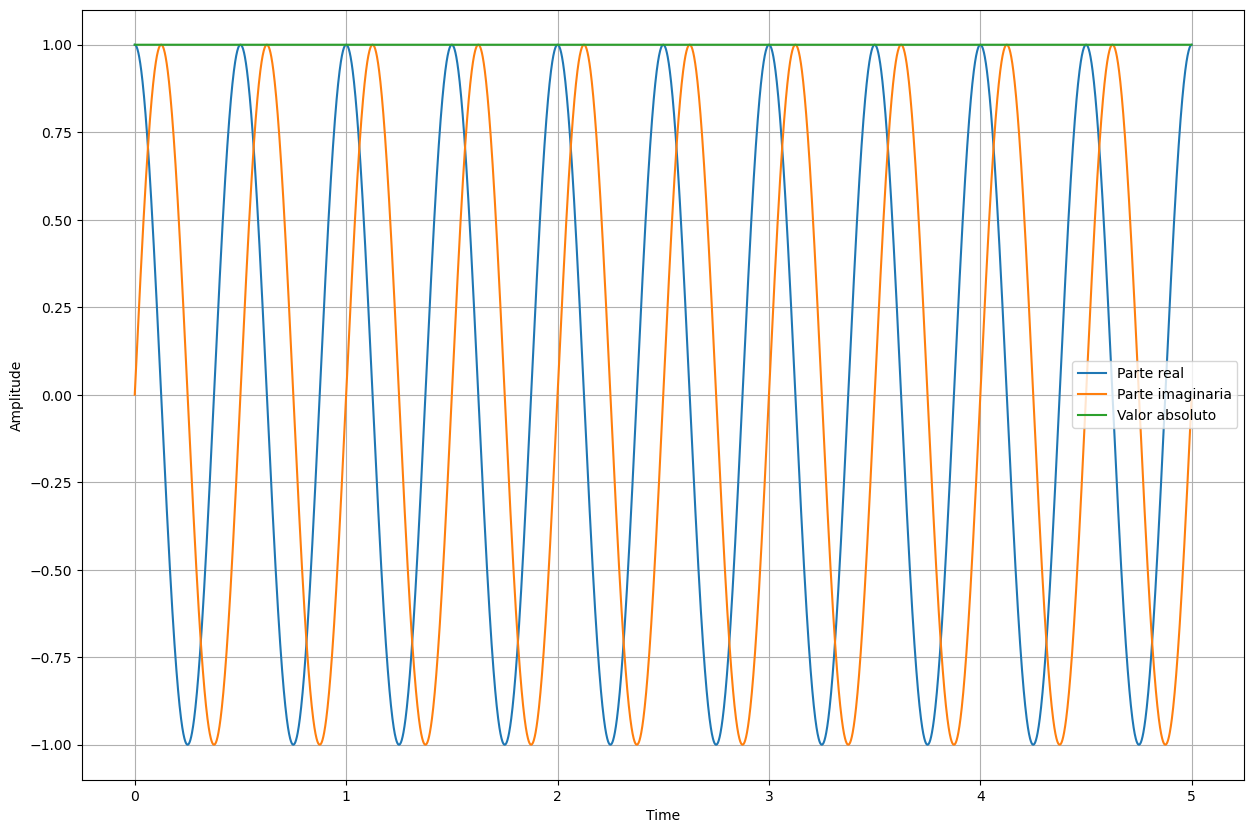

In [ ]:
plt.figure(figsize=(15, 10))
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.plot(t, np.real(x), label='Parte real')
plt.plot(t, np.imag(x), label='Parte imaginaria')
plt.plot(t, np.abs(x), label='Valor absoluto')
plt.grid()
plt.legend(loc='best')
plt.show()

Veamos ahora una señal no periódica que usaremos bastante en el curso: el pulso rectangular. La misma se define como:
$$ x(t)=\left\{\begin{array}{cc}1 & 0\leq t\leq\tau \\
0 & \mbox{en otro caso}\end{array}\right. $$

In [ ]:
amplitude = 1
sample_rate = fs
duration = D
width = 0.2  #It is a fraction of the total window duration
position = 0.5 #As fraction indicates where the pulse begins
t,x = generate_square_pulse(amplitude, sample_rate, duration, position, width)

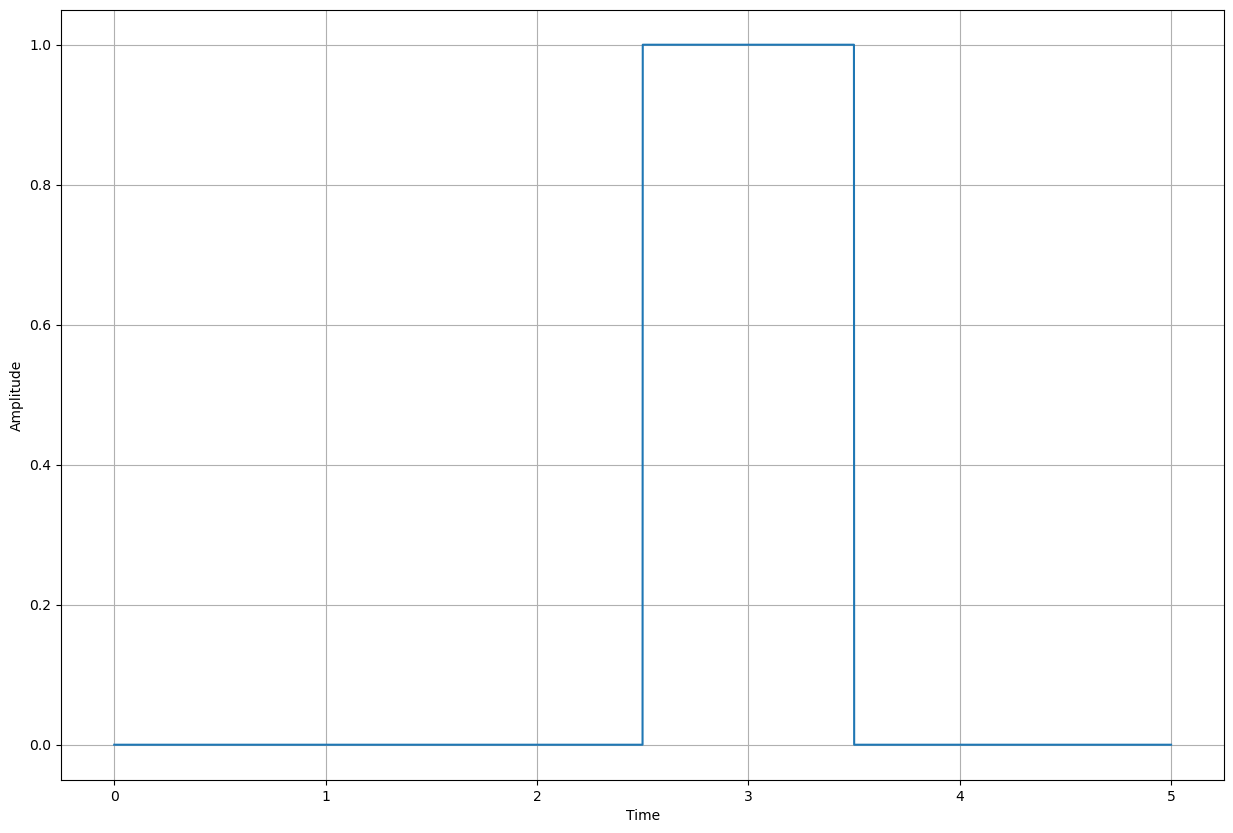

In [ ]:
plt.figure(figsize=(15, 10))
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.plot(t, x)
plt.grid()
plt.show()

Ahora tomemos este pulso y generemos una señal periódica: la onda rectangular. La misma es el pulso anterior pero definida con la propiedad:
$$ x(t)=x(t+T) $$
En este tipo de señal se define el ciclo de servicio como:
$$ \mbox{duty-cycle}=\frac{\tau}{T} $$

In [ ]:
amplitude = 1
freq=2
sample_rate = fs
duration = D
duty_cycle = 0.5 
t,x = generate_square_wave(amplitude, freq, sample_rate, duration, duty_cycle)

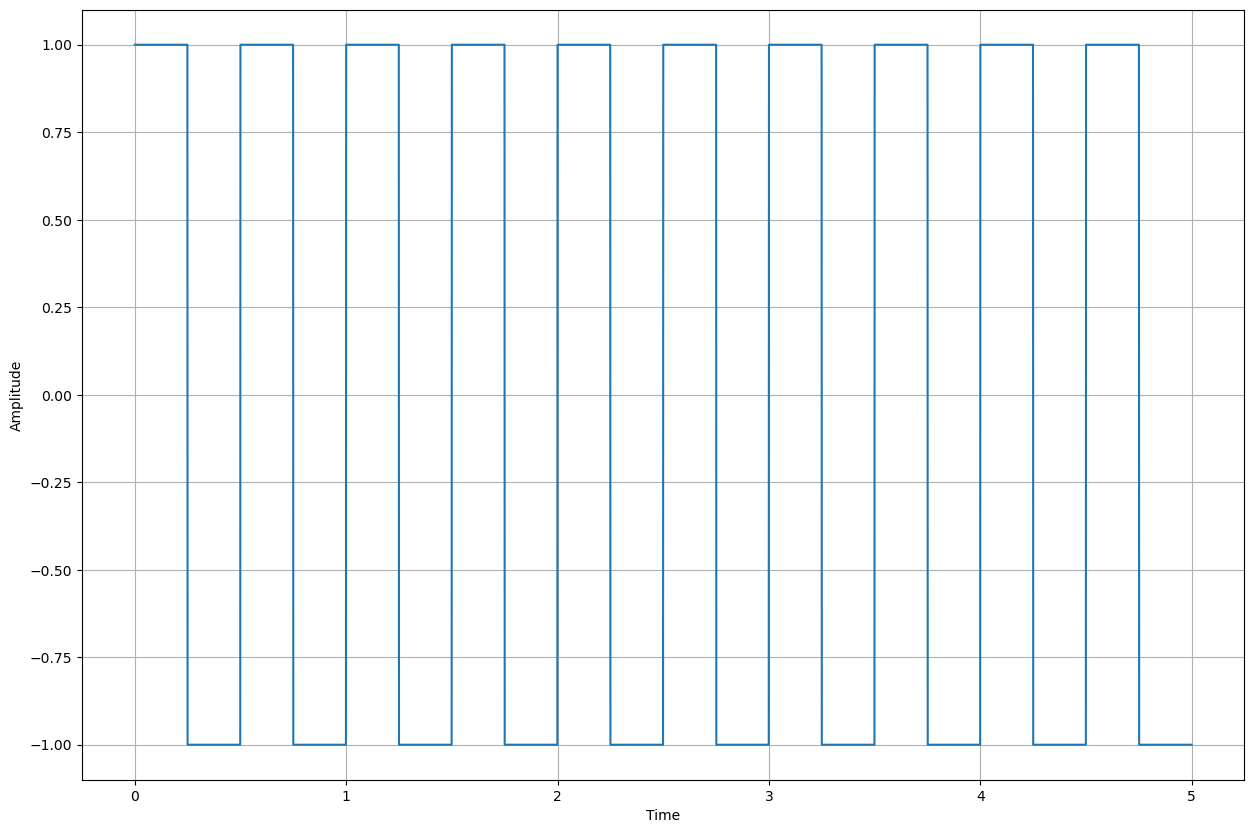

In [ ]:
plt.figure(figsize=(15, 10))
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.plot(t, x)
plt.grid()
plt.show()

En lugar de usar rectángulos usemos triángulos!

In [ ]:
amplitude = 1
freq=2
sample_rate = fs
duration = D
width = 0.5  #Width of the rising ramp as a proportion of the total cycle. 
             #1 produces a rising ramp, while 0 produces a falling ramp. width = 0.5 produces a triangle wave.
t,x = generate_sawtooth_wave(amplitude, freq, sample_rate, duration, width)

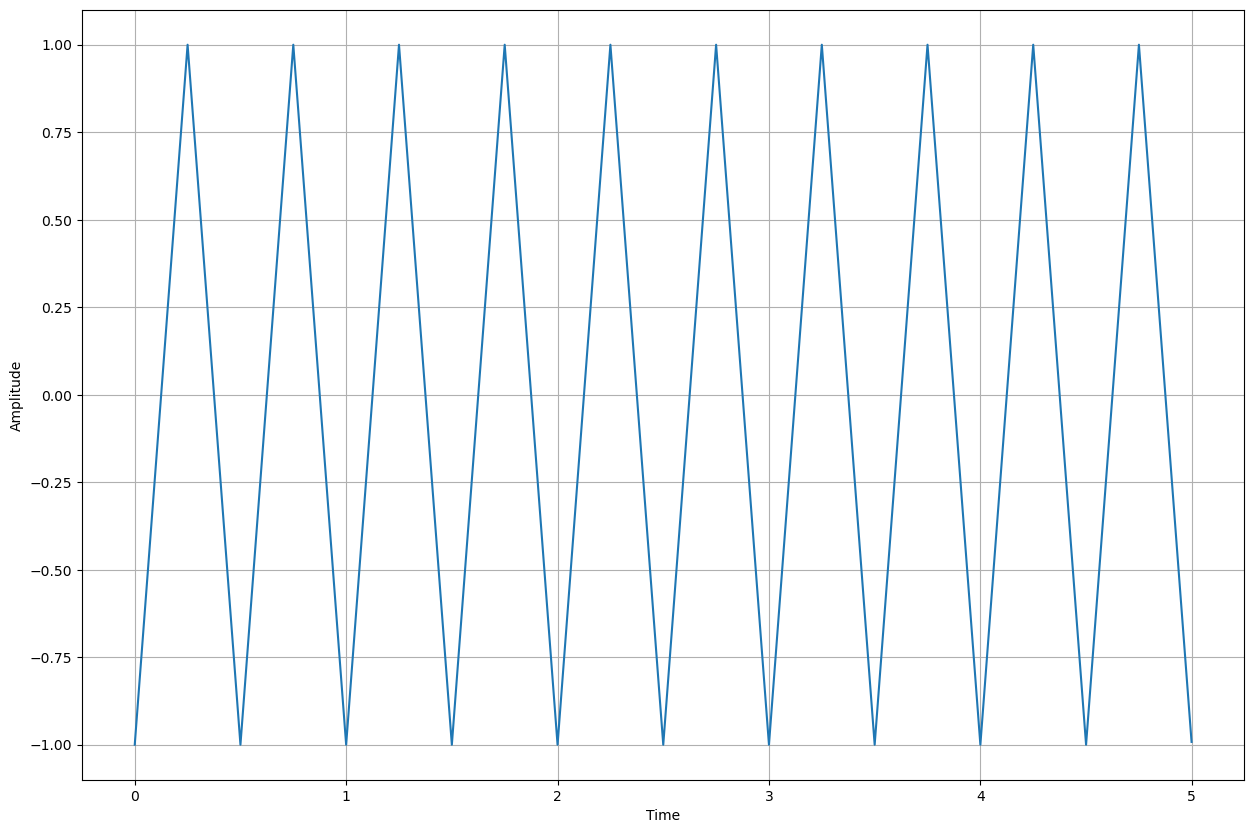

In [ ]:
plt.figure(figsize=(15, 10))
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.plot(t, x)
plt.grid()
plt.show()

Veamos ahora una señal más "rara". Vamos graficar una señal chirp. Estas señales se pueden pensar como senos o cosenos cuya frecuencia no es estacionaria sino que van cambiando con el tiempo. Son de útilidad en sistemas como radares. También se usan para transmisiones de radio FM. La forma funcional estándar de estas señales está dada por:
$$ x(t)=A e^{j\left(2\pi \int_0^t f(\tau)d\tau + \phi\right)} $$

Fijense que el término $2\pi f t$ típico de cualquier señal armónica se reemplaza por $2\pi \int_0^t f(\tau)d\tau$. Podemos decir que $f(t)$ es la frecuencia instantánea de la señal. El caso más común es el de la chirp lineal en donde $f(t)=c(t-t_0)+ f_0$. En este caso se aprecia que la "frecuencia" varía linealmente y que por ende la dependencia con el tiempo en la fase de la señal $x(t)$ es cuadrática con $t$. O sea:
$$ x(t)=A e^{j\left(\pi c(t-t_0)^2 +2\pi f_0 t  + \phi\right)} $$

Generemos la parte real de la señal de arriba:

$$x(t)=A \cos\left(\pi c(t-t_0)^2 +2\pi f_0 t  + \phi\right)$$

In [ ]:
amplitude = 1
freq1=0
freq2=10
t2_freq2=1 #Time at which is specified freq2. Value between 0 and 1 and the actual time in seconds is t2_freq2*duration
sample_rate = fs
duration = D
t, x = generate_chirp_wave(amplitude, freq1, freq2, t2_freq2, sample_rate, duration, method='linear', phi=0)

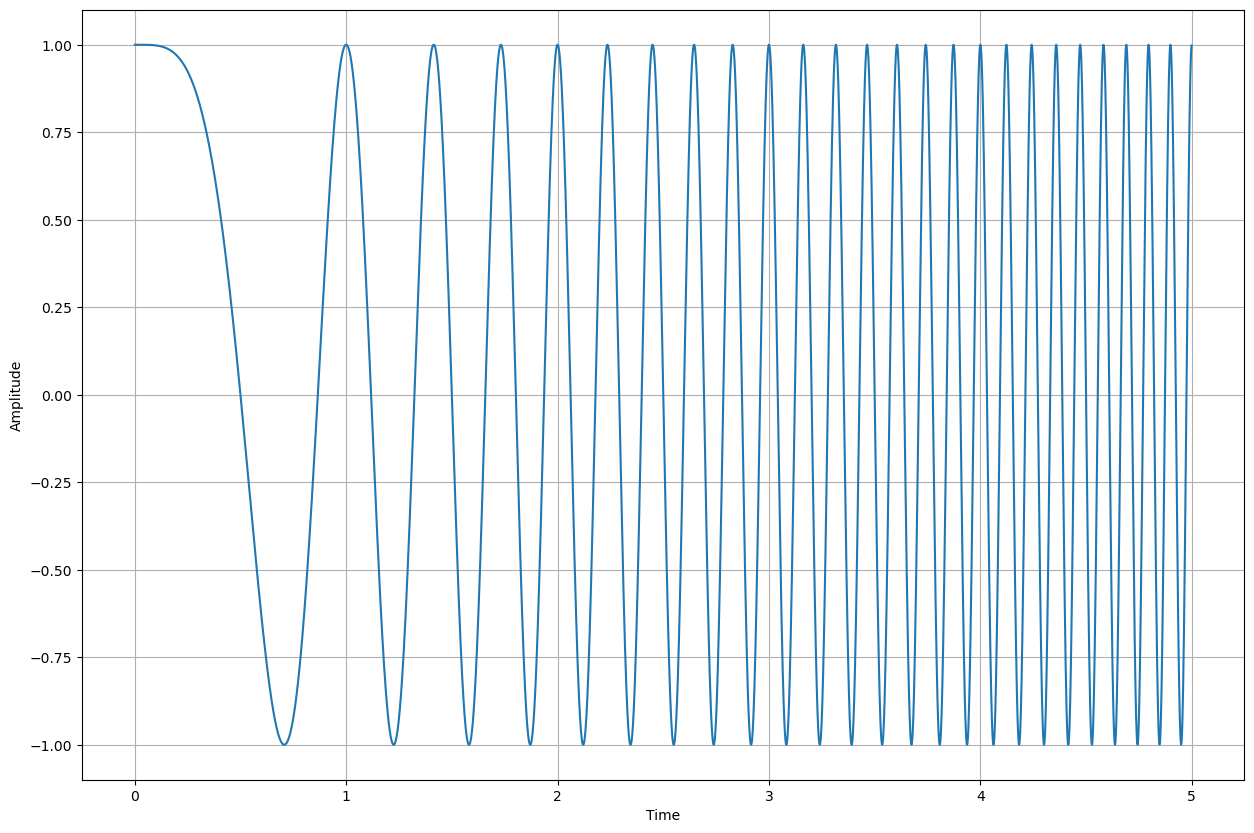

In [ ]:
plt.figure(figsize=(15, 10))
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.plot(t, x)
plt.grid()
plt.show()

Finalmente consideremos el pulso gaussiano modulado. Esta señal es importante en el área de comunicaciones. Es una señal que se puede usar para transmitir información. Por ejemplo, las señales que representan los bits enviados por la iluminación de un láser sobre una fibra óptica se pueden modelar de esta forma. La forma matemática de esta señal es:
$$x(t)= e^{-at²}e^{j2\pi f_0 t} $$
Notar que el factor gaussiano $e^{-at²}$ "modula" la amplitud de una exponencial compleja. En el caso de la fibra óptica, el factor gaussiano es el que representa el bit enviado (típicamente un 1), mientras el factor $e^{j2\pi f_0 t}$ considera las oscilaciones de la luz del láser (para un láser de color rojo, $f_0\approx 430 \mbox{THz}$).

In [ ]:
amplitude = 1
freq = 2
bw = 0.1             #Fractional bandwidth in Hz of gaussian pulse in frequency domain
bwr = -6              #Reference level at which fractional bandwidth is calculated (dB).
sample_rate = fs
duration = D
t, x_I, x_Q, env = generate_gaussian_pulse(amplitude, freq, bw, bwr, sample_rate, duration)

Grafiquemos: 
1) Componente en fase: $x_I(t)=e^{-at²}\cos(2\pi f_0 t)$.
2) Componente en cuadratura: $x_Q(t)=e^{-at²}\sin(2\pi f_0 t)$.
3) Envolvente: $\mbox{env}(t)=e^{-at²}$


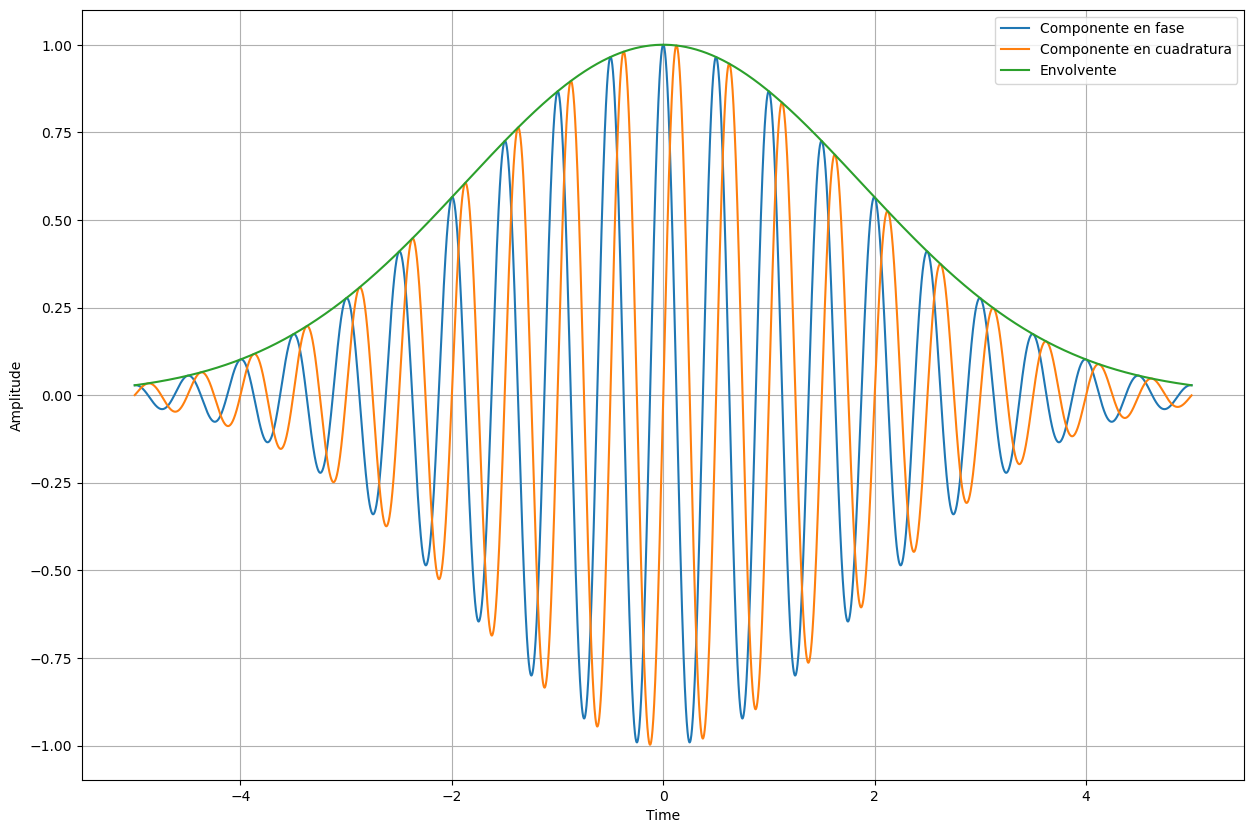

In [ ]:
plt.figure(figsize=(15, 10))
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.plot(t, x_I, label='Componente en fase')
plt.plot(t, x_Q, label='Componente en cuadratura')
plt.plot(t, env, label='Envolvente')
plt.grid()
plt.legend(loc='best')
plt.show()